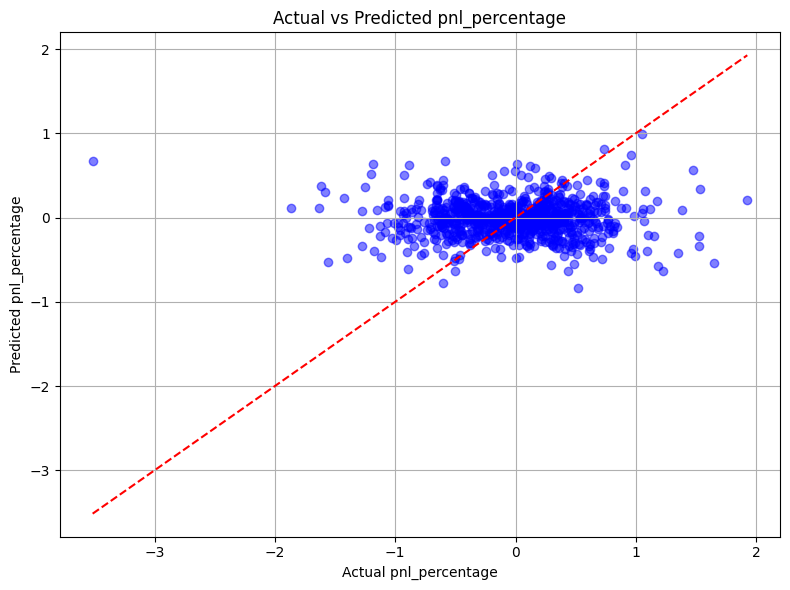

Mean Squared Error: 0.3368
R² Score: -0.2012


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("task_03.csv")  

def calculate_pnl_percentage(row):
    if row['side'] == 'BUY':
        return ((row['exit_price'] - row['entry_price']) / row['entry_price']) * 100
    elif row['side'] == 'SELL':
        return ((row['entry_price'] - row['exit_price']) / row['entry_price']) * 100
    else:
        return 0

df['pnl_percentage'] = df.apply(calculate_pnl_percentage, axis=1)

def time_to_minutes(entry_time_str):
    hour, minute = map(int, entry_time_str.split(':'))
    total_minutes = hour * 60 + minute
    market_open_minutes = 9 * 60 + 15
    return total_minutes - market_open_minutes

df['entry_minutes'] = df['entry_time'].apply(time_to_minutes)

features = ['entry_support_distance%', 'entry_resistance_distance%', 'entry_minutes']
target = 'pnl_percentage'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual pnl_percentage")
plt.ylabel("Predicted pnl_percentage")
plt.title("Actual vs Predicted pnl_percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
